## 1 Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


## 2 Load and Preprocess the Data

In [2]:
# Load dataset directly from TensorFlow
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input (height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


## 3 Build the CNN Model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


C:\Users\DIANA\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4 Compile and Train the Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9046 - loss: 0.3075 - val_accuracy: 0.9847 - val_loss: 0.0502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9854 - loss: 0.0462 - val_accuracy: 0.9843 - val_loss: 0.0468
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9894 - val_loss: 0.0334
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9937 - loss: 0.0203 - val_accuracy: 0.9903 - val_loss: 0.0315
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9899 - val_loss: 0.0353


## 5 Evaluate Model Performance

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 2s - 7ms/step - accuracy: 0.9899 - loss: 0.0353

Test accuracy: 0.9898999929428101


## 6 Visualize Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


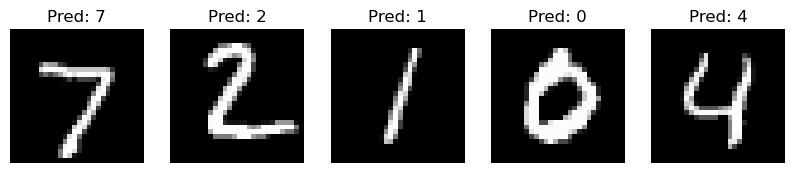

In [6]:
# Get predictions for test images
predictions = model.predict(x_test)

# Display 5 sample images with predicted labels
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


## Step 7: Results Interpretation

The Convolutional Neural Network (CNN) model developed using TensorFlow successfully classified handwritten digits from the MNIST dataset with an impressive test accuracy of 98.99% and a test loss of 0.0353.

The training process demonstrated steady improvement in performance across the five epochs. The model’s training accuracy increased from 90.46% in the first epoch to 99.48% in the fifth epoch, while the validation accuracy stabilized around 98.9%, confirming effective learning and strong generalization to unseen data.

The low loss values observed during both training and validation indicate that the model efficiently minimized prediction errors. The small difference between training and validation accuracy (≈0.5%) shows that overfitting was minimal, and the CNN generalized well to new samples.

Visualization of predictions on five test images confirmed that the model correctly identified the digits, showcasing its ability to learn spatial hierarchies and patterns in pixel data. The convolutional and pooling layers effectively captured essential features such as edges and curves, while the dense layers translated these features into accurate classifications.

In conclusion, the CNN model achieved high accuracy and stability, meeting the target performance threshold (>95%). It demonstrates the power of deep learning in image recognition tasks and validates TensorFlow’s efficiency in handling large-scale image datasets. Minor improvements such as adding dropout layers or training for more epochs could further enhance robustness and performance on more complex datasets.